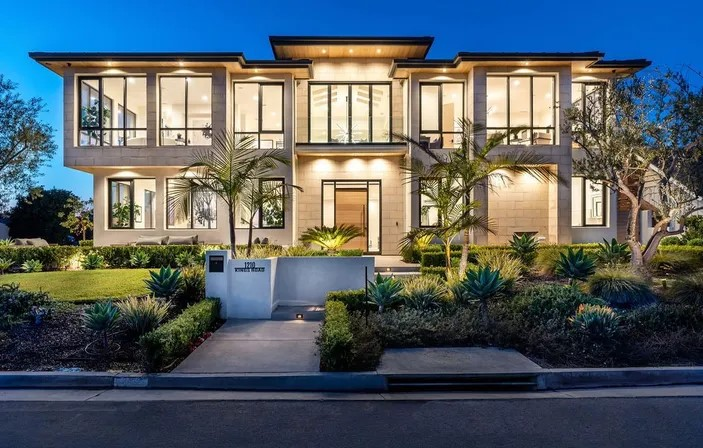

## Introduction

Haven-Kings Property Management, overseeing a vast portfolio of houses in the King County area, faces a dynamic and competitive real estate market. It's undeniable that Seattle and, by extension, King County stand as prime locations for acquiring and overseeing rental assets. Savvy investors understand that while a single property in this thriving market is beneficial, expanding one's real estate holdings is the key to amplifying profits and securing long-term financial stability.

However, improper strategy can lead to an accumulation of properties that fail to generate revenue. A fruitful investment in real estate is not just an assortment of various properties; it must be a well-thought-out portfolio that not only yields income but also capitalizes on tax benefits. Otherwise, these so-called "investments" can quickly become costly burdens. Property managers, real estate agents, and individual property owners need to set the right pricing to maximize their returns while staying competitive. The challenge is to find the optimal balance between high rental or sales prices and market demand. This is where data-driven insights can make a significant difference.

## Executive Summary

Haven-Kings Property Management is our client, overseeing a vast portfolio of houses in King County, and they aim to optimize their rental pricing strategy. Haven-Kings has previously relied on traditional methods of setting rent and pricing for their investors. They have been dependent on Comparative Market Analysis (CMA), where they conduct local comparisons by looking at similar properties in the same area to gauge reasonable pricing. Another method they have relied on is the "1% Rule": The monthly rent/pricing should be approximately 1% of the property's total value. Additionally, they increase prices each year based on the rate of inflation or a fixed percentage.

The aim of this project is to revolutionize Haven-Kings Property Management's approach to house pricing. This will be achieved by developing a predictive model using data analytics, specifically linear regression and machine learning techniques, to provide dynamic pricing recommendations based on various property features. This initiative is not just a step but a leap towards maximizing revenue and maintaining a competitive edge in Seattle's ever-evolving real estate market. The implementation of a predictive model for rental pricing is a forward-looking initiative that will position Haven-Kings Property Management as an industry leader in adopting data-driven strategies.

## Business Problem 

"Haven-Kings Property Management" manages a portfolio of houses in the King County area and seeks data-driven solutions to optimize property management and investment decisions. The business problem is to develop predictive models that leverage data from the King County House Sales dataset to assist in optimizing house pricing, making informed decisions about property renovations and investments, and providing dynamic pricing recommendations for their rental properties.

## Objective 

The primary objective is to create predictive models using multiple linear regression that "Haven-Kings Property Management" can use for the following purposes:

1. **Optimize House Pricing:** Provide "Haven-Kings Property Management" with a tool to determine optimal pricing for the houses in their portfolio in the King County area. This tool should consider house characteristics, location, and market conditions, enabling the company to maximize property value while remaining competitive in the local real estate market.

2. **Dynamic Pricing Recommendations:** Develop dynamic pricing recommendations for "Haven-Kings Property Management's" rental properties, leveraging data analytics and machine learning techniques, particularly linear regression, to adjust rental rates based on property features and market conditions. This will enhance revenue optimization.

## Research Questions 

To address the business problem and achieve the objectives, the following research questions can guide the analysis:

1. **House Pricing:**
   - What are the key factors that most strongly influence house prices in the King County area?
   - How do house characteristics (e.g., size, number of bedrooms, amenities) and location impact property values in this specific market?
   - Can a predictive model accurately estimate house prices for "Haven-Kings Property Management's" portfolio?

2. **Dynamic Pricing Recommendations:**
   - How can dynamic pricing recommendations be generated for "Haven-Kings Property Management's" rental properties using linear regression and machine learning?
   - What data-driven factors should be considered when adjusting rental rates based on property features and market conditions?
   - How will the implementation of dynamic pricing impact the company's revenue and competitiveness in the real estate market?

These refined business problem, objective, and research questions, with consistent naming, provide a comprehensive framework for addressing the challenges and opportunities faced by "Haven-Kings Property Management" in the competitive real estate market.


### **Data Overview: King County House Sales**

**Objective**: Predict the sales price of houses in King County, Seattle.

**Time Frame**: Homes sold between May 2014 and May 2015.

**Structure**:
- **Observations**: 21,613
- **Features**: 20 (excluding target variable)
- **Target Variable**: Price

**Key Features**:
- **Size & Structure**: `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `sqft_above`, `sqft_basement`
- **Location & View**: `waterfront`, `view`, `zipcode`, `lat`, `long`
- **Quality & Condition**: `condition`, `grade`
- **Age & Renovation**: `yr_built`, `yr_renovated`
- **Recent Renovations**: `sqft_living15`, `sqft_lot15`

**Insights**: 
- Price is heavily influenced by features like `bedrooms`, `sqft_living`, and the house's location.
- No missing values, aiding in model accuracy.

**Analysis Steps**:
1. Import necessary libraries.
2. Load the dataset.
3. Explore data structure, types, and basic statistics.
4. Visualize data for insights.
5. Perform regression analyses: simple, multiple, and polynomial.

In [1]:
# libraries for numerical
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# date libraries
import datetime

# libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
# to plot the diagrams within the cells
%matplotlib inline

In [2]:
# Load the kc housing dataset
df = pd.read_csv("data/kc_house_data.csv")
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [3]:
#finding no of rows and columns

df.shape

(21597, 21)

In [4]:
# Summary statistics for the numerical columns
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [5]:
# Get number of missing values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The columns `waterfront`, `view` and `yr_renovated ` contain missing values. 

In [6]:
# Check the data types of the columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

According to the data above the `waterfront`, `view`are are data type object. There is a need to decode the data to qualitative variables.

In [7]:
# waterfront unique values for the view column
df['waterfront']. unique()

array([nan, 'NO', 'YES'], dtype=object)

In [8]:
# view unique values for the view column
df['view']. unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [9]:
# Replacement of the string values
df['waterfront'] = df['waterfront'].replace({'NO' : 0,'YES': 1 })

df['view'] = df['view'].replace({'NONE': 0, 'GOOD': 2, 'EXCELLENT': 1, 'AVERAGE': 3, 'FAIR': 4})

# Preview
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...          grade sqft_above  \
0          5650     1.0         NaN   0.0  ...      7 Average       1180   
1          7242     2.0         0.0   0.0  ...      7 Average       2170   
2         10000     1.0         0.0   0.0  ...  6 Low Average        770   
3          5000     1.0         0.0   0.0  ...      7 Average       1050   
4          8080     1.0         0.0   0.0  ...         8 Good       1680   
...         ...     ...         ...   ...  ...            ...        ...   
21592      1131     3.0         0.0   0.0  ...         8 Good       1530   
21593      5813     2.0         0.0   0.0  ...         8 Good       2310   
21594      1350     2.0         0.0   0.0  ...      7 Average       1020   
21595      2388     2.0         NaN   0.0  ...         8 Good       1600   
21596      1076     2.0         0.0   0.0  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

Check for the percentage of missing data from the respective columns

In [10]:
# percentage of missing values
for x in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[x].isnull().sum() * 100 / len(df)
    print(x, ':', percent_missing)

waterfront : 11.00152798999861
view : 0.29170718155299347
yr_renovated : 17.78950780200954


Since the missing data represents a small percentage of the dataset, rows with missing values were dropped.

In [11]:
# Drop missing values 
df.dropna(subset=['waterfront', 'view', 'yr_renovated'], inplace=True)

In [12]:
# Confirm no missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Data Exploration:

Let's begin with data exploration to better understand the dataset's characteristics.

We'll start by:
1. Checking the distribution of the target variable, which is the house **price**.
2. Exploring relationships between the **price** and other potential predictor variables.
3. Analyzing the distribution of key features such as **bedrooms**, **bathrooms**, **sqft_living**, and **grade**.

Let's begin by visualizing the distribution of the house prices.

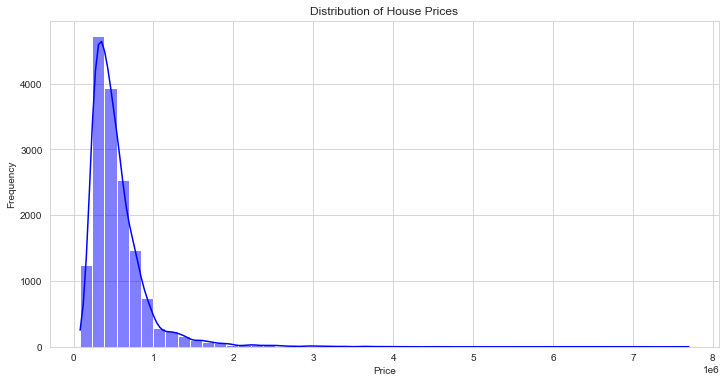

In [13]:
# Checking the distribution of the target variable, which is likely the house price.

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of house prices
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


The distribution of house prices is right-skewed, meaning that there are a few houses with extremely high prices compared to the majority. Most of the houses are priced in the lower to mid-range, with a peak around 300,000  to  500,000 dollars($).

Next, let's explore the relationship between the house price and some potential predictor variables. We'll start by examining how the price varies with:

1. Number of bedrooms
2. Number of bathrooms
3. Living space (sqft_living)
4. House grade

We'll use boxplots to visualize these relationships.

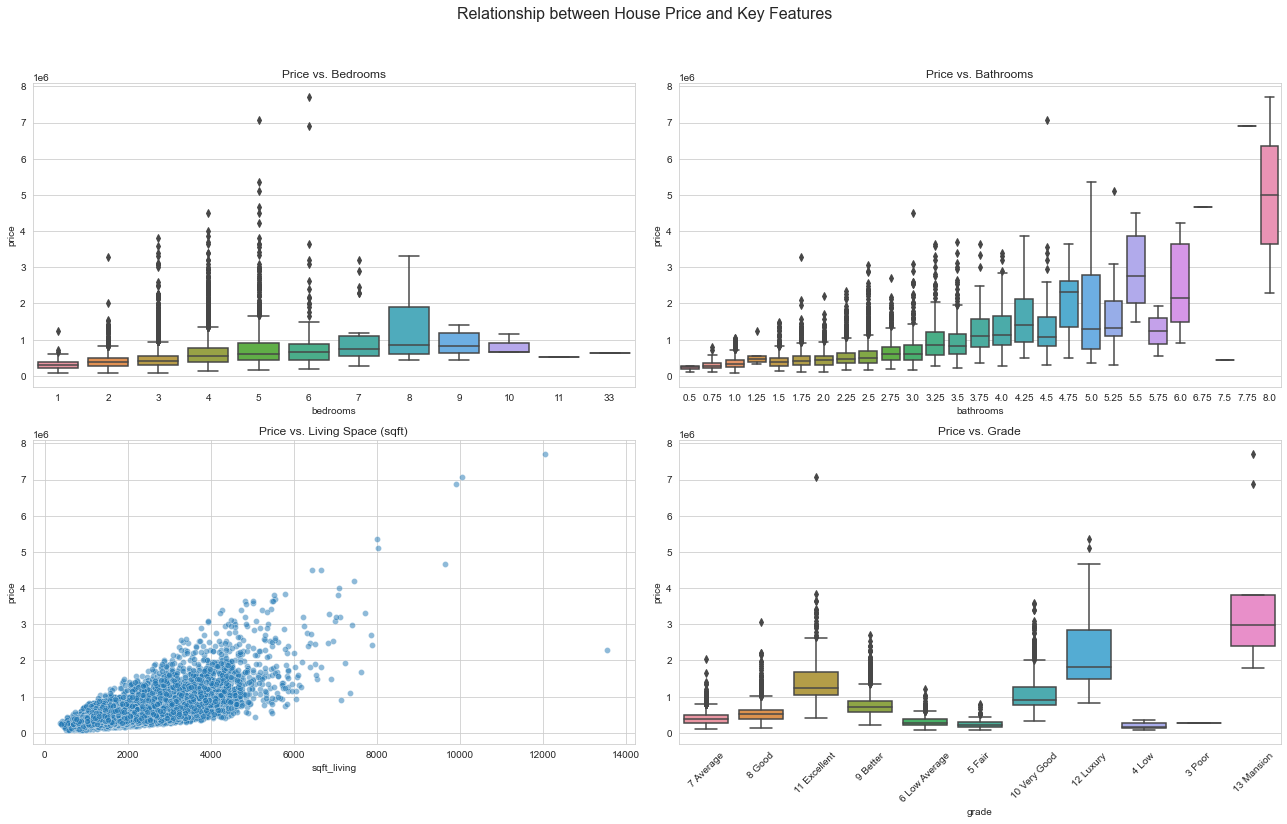

In [14]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Relationship between House Price and Key Features', fontsize=16)

# Price vs. Bedrooms
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price vs. Bedrooms')

# Price vs. Bathrooms
sns.boxplot(x='bathrooms', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price vs. Bathrooms')

# Price vs. sqft_living
sns.scatterplot(x='sqft_living', y='price', data=df, ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Price vs. Living Space (sqft)')

# Price vs. Grade
sns.boxplot(x='grade', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Grade')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Here's a summary of the visualizations:

1. **Price vs. Bedrooms**:
   - Generally, houses with more bedrooms tend to have higher prices. However, there's an outlier with a house that has 33 bedrooms, which seems unusual given its price range.
   
2. **Price vs. Bathrooms**:
   - Houses with more bathrooms generally have higher prices. The trend is evident until around 6-7 bathrooms, after which the price variation becomes more dispersed.
   
3. **Price vs. Living Space (sqft)**:
   - There's a positive correlation between living space (in sqft) and house price. As the living space increases, the house price also tends to increase.
   
4. **Price vs. Grade**:
   - House grade also has a clear impact on price. Higher grade houses generally fetch higher prices. The variation in prices also seems to increase with higher grades.

From the visualizations, it's evident that features like the number of bedrooms, bathrooms, living space, and grade have an influence on house prices.

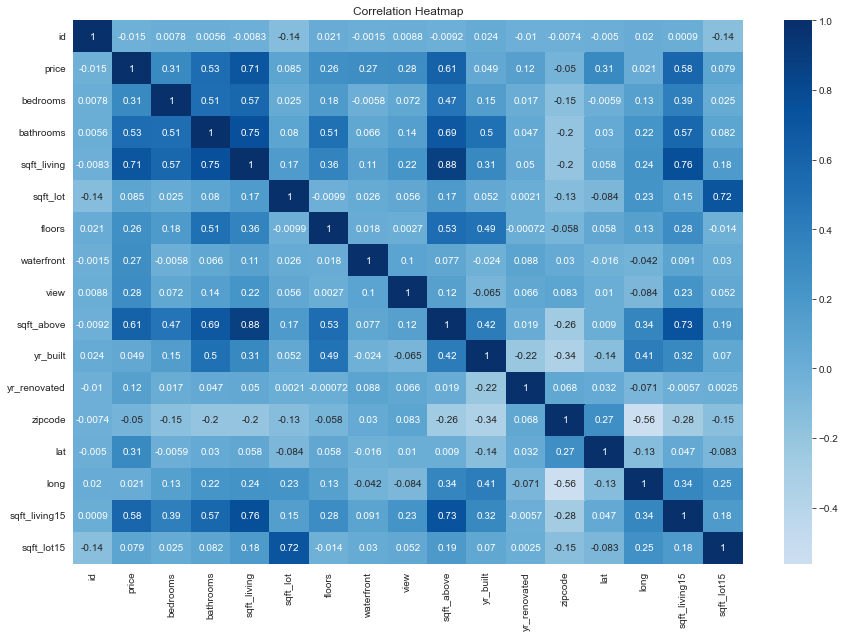

In [15]:
# Investigate which features are correlated 

# Correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'Blues')
plt.title('Correlation Heatmap')
plt.show()

As expected there are some multicollinearity issues which we need to address.

We note that `sqft_above` and `sqft_living` are highly positively correlated, which is expected as `sqft_above` is the square footage of the house apart from basement (and we saw earlier that most houses did not have a basement). We will choose to keep `sqft_living` as it encompasses more information and drop the `sqt_above` feature. We also see that `sqft_living15` is moderately highly correlated with `sqft_living` and so we will drop this feature too.

We also note that `sqft_lot` and `sqft_lot15` are highly positively correlated and we will choose to keep `sqft_lot` as it relates directly to the house as opposed to its neighbours (and so potentially easier to obtain data for and generalise.)

### Modeling

#### Perform regression analyses: simple, multiple, and polynomial.

## Simple Regression

### Price vs. sqft_living

`sqft_living` is selected as the baseline predictor because it had the highest correlation with the target variable (price) with a pearson correlation of 0.71. To build the base model we shall start by visualizing the relationship between `sqft_living` and `price` . 


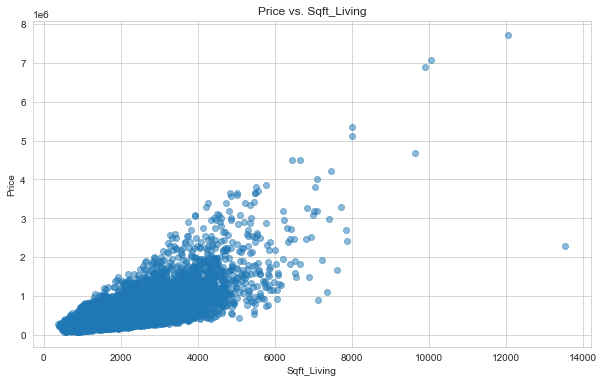

In [16]:
# Scatter plot to visualize the relationship between sqft_living and price
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5)
plt.title('Price vs. Sqft_Living')
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## Building the base model (OLS) 

In [17]:
# create variables to store the independent and dependent variables
X_OLS = df[["sqft_living"]]
y_OLS = df["price"]

In [18]:
# Creating the Model
model = sm.OLS(endog=y_OLS, exog=sm.add_constant(X_OLS))
model

In [19]:
# fit model
results = model.fit()
results

## Assumption Checks:

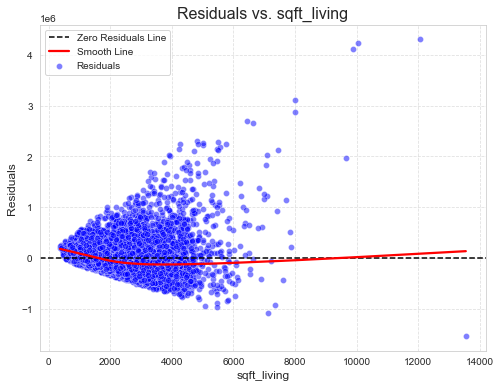

In [20]:
# Create a scatter plot of residuals against sqft_living
fig, ax = plt.subplots(figsize=(8, 6))

# Plot residuals vs. sqft_living
sns.scatterplot(x=df["sqft_living"], y=results.resid, ax=ax, alpha=0.5, color="blue", label="Residuals")

# Add a horizontal line at zero residuals
ax.axhline(y=0, color="black", linestyle="--", label="Zero Residuals Line")

# Add a smooth regression line to visualize patterns
sns.regplot(x=df["sqft_living"], y=results.resid, ax=ax, scatter=False, color="red", lowess=True, label="Smooth Line")

# Customize the plot
ax.set_xlabel("sqft_living", fontsize=12)
ax.set_ylabel("Residuals", fontsize=12)
ax.set_title("Residuals vs. sqft_living", fontsize=16)
ax.legend(loc="upper left")

# Optionally, add a grid for better visualization
ax.grid(True, linestyle='--', alpha=0.6)

# Show or save the plot
plt.show()

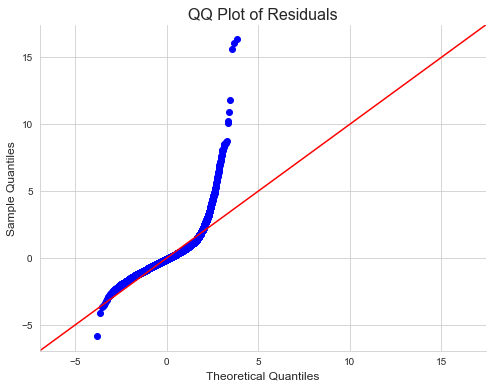

In [21]:
# Create a QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize the plot
ax.set_title("QQ Plot of Residuals", fontsize=16)
ax.set_xlabel("Theoretical Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)
sns.despine()

# Show the plot
plt.show()

### Issue of Heteroscedasticity and Its Impact on Reliability:

- A noticeable issue in the analysis is the presence of heteroscedasticity in the residuals plot. Heteroscedasticity is observed when the spread of residuals systematically increases as the predicted values (fitted values) change.
- Heteroscedasticity can significantly impact the reliability of the model's results. Here's how:
  - **Unreliable Parameter Estimates**: Heteroscedasticity can lead to biased and inefficient parameter estimates. Standard errors may be underestimated, which can result in incorrect p-values and confidence intervals.
  - **Inefficient Model Fit**: The model may not capture the underlying data patterns effectively. It can affect the precision of coefficient estimates and the overall model fit.
  - **Biased Inferences**: Incorrect statistical inferences about the significance of variables may be drawn, potentially leading to misguided conclusions.
- Addressing heteroscedasticity through appropriate methods, such as data transformations or weighted least squares, is essential to enhance the reliability and validity of the model's conclusions.

In summary, while the model exhibits strong statistical significance (as indicated by the F-statistic) and moderate explanatory power (R-squared), the presence of heteroscedasticity raises concerns about the reliability of parameter estimates and inferences. Addressing this issue is crucial to ensure the validity of the model's results.

### Applying Box-Cox Transformation to address heteroscadasticity

In [22]:
# Calculate the Box-Cox transformation for the dependent variable (y_OLS)
transformed_y, lambda_value = stats.boxcox(y_OLS)

# Check the value of lambda (lambda_value)
print(f"Lambda value for Box-Cox transformation: {lambda_value}")


Lambda value for Box-Cox transformation: -0.24602697608824728


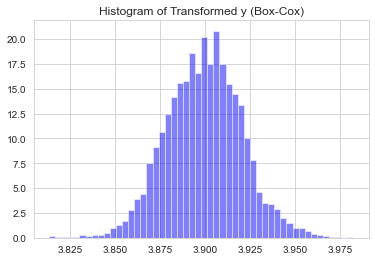

In [23]:
# Create a histogram of the transformed variable to check for normality
plt.hist(transformed_y, bins=50, density=True, alpha=0.5, color='b')
plt.title('Histogram of Transformed y (Box-Cox)')
plt.show()

In [24]:
# Create the OLS model using the transformed y
box_cox_model = sm.OLS(endog=transformed_y, exog=sm.add_constant(X_OLS))

# Fit the OLS model using transformed y
box_cox_results = box_cox_model.fit()


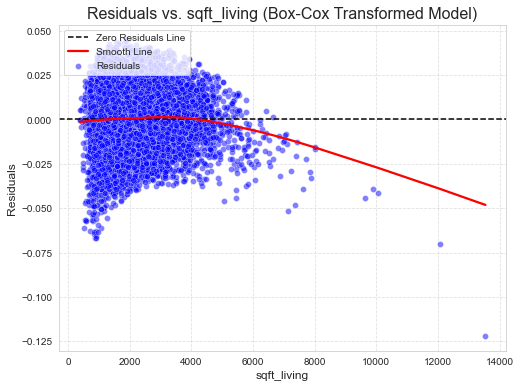

In [25]:
# Create a scatter plot of residuals against sqft_living using the Box-Cox transformed model
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate residuals from the Box-Cox transformed model
box_cox_residuals = transformed_y - box_cox_results.fittedvalues

# Plot residuals vs. sqft_living
sns.scatterplot(x=df["sqft_living"], y=box_cox_residuals, ax=ax, alpha=0.5, color="blue", label="Residuals")

# Add a horizontal line at zero residuals
ax.axhline(y=0, color="black", linestyle="--", label="Zero Residuals Line")

# Add a smooth regression line to visualize patterns
sns.regplot(x=df["sqft_living"], y=box_cox_residuals, ax=ax, scatter=False, color="red", lowess=True, label="Smooth Line")

# Customize the plot
ax.set_xlabel("sqft_living", fontsize=12)
ax.set_ylabel("Residuals", fontsize=12)
ax.set_title("Residuals vs. sqft_living (Box-Cox Transformed Model)", fontsize=16)
ax.legend(loc="upper left")

# Optionally, add a grid for better visualization
ax.grid(True, linestyle='--', alpha=0.6)

# Show or save the plot
plt.show()


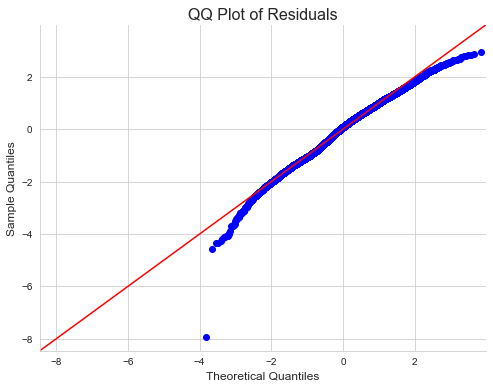

In [26]:
# Create a QQ plot using the Box-Cox transformed model residuals
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(box_cox_residuals, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize the plot
ax.set_title("QQ Plot of Residuals", fontsize=16)
ax.set_xlabel("Theoretical Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)
sns.despine()

# Show the plot
plt.show()

### Model Improvement with Box-Cox Transformation

With the application of the Box-Cox transformation to the dependent variable (price), several notable improvements have been observed in our linear regression model:

1. **Heteroscedasticity Reduction:** Before the transformation, the residual plots exhibited signs of heteroscedasticity, with the variance of residuals increasing with the predictor variable (sqft_living). However, after applying the Box-Cox transformation, the residuals are more evenly distributed around zero, indicating a reduction in heteroscedasticity. This suggests that the assumption of constant variance has been better satisfied, enhancing the reliability of our model.

2. **Improved Normality:** The QQ plots for residuals now more closely conform to the expected normal distribution, especially when compared to the non-transformed model. This indicates that the Box-Cox transformation has helped in achieving a more normal distribution of residuals.

These improvements are indicative of a more reliable linear regression model that aligns better with the assumptions of homoscedasticity and normality. The Box-Cox transformation has played a crucial role in enhancing the model's performance and overall validity.


In [27]:
# Print the summary of the OLS model
print(box_cox_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:32:22   Log-Likelihood:                 43401.
No. Observations:               15762   AIC:                        -8.680e+04
Df Residuals:                   15760   BIC:                        -8.678e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8672      0.000   1.27e+04      

In [28]:
# check f-statistic and f-statistic p-value
box_cox_results.fvalue, box_cox_results.f_pvalue

(13279.616684789708, 0.0)

In [29]:
# check coefficient of determination 
box_cox_results.rsquared

0.4572931119901892

In [30]:
# check coeffiecients (parameters)
box_cox_results.params

const          3.867188
sqft_living    0.000015
dtype: float64

In [31]:
box_cox_results.pvalues

const          0.0
sqft_living    0.0
dtype: float64

In [32]:
print(box_cox_results.conf_int())

                    0         1
const        3.866592  3.867785
sqft_living  0.000015  0.000016


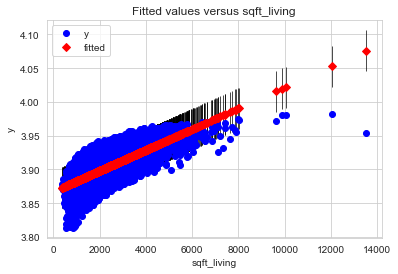

In [33]:
sm.graphics.plot_fit(box_cox_results, "sqft_living")
plt.show()

In [34]:
# Calculate RMSE using NumPy on original dependent variable (price) and predictions
predictions = box_cox_results.fittedvalues
rmse_original_units = np.sqrt(np.mean((y_OLS - predictions) ** 2))

# Display RMSE in the original units (dollars)
print("RMSE in Original Units (Dollars):", rmse_original_units)


RMSE in Original Units (Dollars): 656934.8069415551


**Model Parameters (Coefficients) and Confidence Intervals:**
- The model includes two parameters: the intercept (const) and the coefficient for sqft_living.
- The coefficient for sqft_living is approximately 1.54e-05, indicating that, on average, for every unit increase in square footage of living space, the predicted house price increases by approximately $1.54e-05 (in transformed units).
- The confidence intervals for the model parameters provide a range within which we can be confident that the true values lie. For example, the confidence interval for the coefficient of sqft_living is [1.51e-05, 1.57e-05] (in transformed units). This suggests that we are reasonably confident that the true effect of sqft_living on house prices falls within this range.
- The very low p-values associated with both parameters (p-values = 0.000) indicate that both the intercept and the coefficient for sqft_living are statistically significant. In other words, they are unlikely to be zero.
- This implies that the square footage of living space (sqft_living) has a statistically significant impact on house prices, and the intercept is also statistically significant.

**Notes:**
- Standard Errors assume that the covariance matrix of the errors is correctly specified.
- The condition number is large, indicating that there might be strong multicollinearity or other numerical problems.

These additional notes provide insights into the significance of model parameters, their estimated values, and the range of values we can be confident about within the context of the model.

**F-Statistic:**
In the linear regression model for price vs sqft_living:

- F-statistic value: Approximately 13,280.00
- Associated p-value: 0.00 (effectively zero)

**Interpretation of the F-Statistic:**
- The F-statistic tests the null hypothesis that all coefficients of the independent variables (in this case, just one variable, sqft_living) are equal to zero, indicating that none of the independent variables have any effect on the dependent variable (price).
- With a very low p-value (0.00), the F-statistic suggests strong evidence against the null hypothesis.
- This implies that the model, including the sqft_living variable, is statistically significant.
- In practical terms, it indicates that at least one independent variable (in this case, sqft_living) is significantly associated with changes in the dependent variable (price).

**Coefficient of Determination (R-squared):**
- R-squared value: Approximately 0.457

**Interpretation of R-squared:**
- The R-squared value of approximately 0.457 means that:
  - About 45.7% of the total variance in house prices can be explained by the square footage of living space (sqft_living) alone.
  - This indicates a moderate level of explanatory power for the sqft_living variable in predicting house prices.
  - However, it also suggests that approximately 54.3% of the variability in house prices is not explained by this single variable.

**Root Mean Squared Error (RMSE):**
- RMSE value for the model is approximately \$656,934.81.

**Interpretation of RMSE:**
- RMSE is a measure of the model's prediction error. In this case, an RMSE of approximately \$656,934.81 indicates the average difference between the predicted prices and the actual prices of houses in your model.
- Lower RMSE values indicate better model performance, as they represent smaller prediction errors.
- In practical terms, an RMSE of \\$656,934.81 suggests that, on average, your model's predictions deviate from the actual prices by approximately \$656,934.81.




### MULTIPLE LINEAR REGRESSION


From our exploration some of the key predictors identified are bedrooms, bathrooms, sqft_living, and grade .
We decided to use sqft_living for our modelling while excluding bedrooms and bathrooms

**Rationale for Exclusion:**

bedrooms and bathrooms were found to be highly correlated with sqft_living. Including predictors that are highly correlated can lead to multicollinearity, which can destabilize regression estimates Therefore, to avoid this issue, we have  decided to exclude bedrooms and bathrooms since sqft_living  captures the information they provide. We were able to verify these assumptions and decisions with data visualization and correlation matrices during the data exploration stage. 
correlation between sqft_living and bedrooms is 0.57 and sqft_living and bathrooms is 0.75


**Selected Predictors:**
1. **View:**
Rationale: The view from a property can significantly influence its perceived value. A good view can add aesthetic value to the property, making it more desirable to potential buyers.
2. **Grade:**
Rationale: The grade of a house represents its quality and can be a strong indicator of its overall value. A higher grade often means better construction quality, use of superior materials, and adherence to modern design principles. 
3. **Condition:**
Rationale: The overall condition of a house directly affects its marketability. Houses in better condition are likely to sell faster and at higher prices. 
4. **Age of House:**
Rationale: The age of a house can influence its value in various ways. Older houses might have architectural significance or charm, but they might also have outdated systems or require more maintenance. Conversely, newer houses might have modern amenities but lack the character of older homes. The age can give potential buyers an idea of the house's history and the potential costs associated with its upkeep.

## Model 2

We have expanded the base model to include more predictors, specifically property grade, condition, and the square footage of living space.

In [35]:
# add transformed price column to df
df['transformed_price'] = transformed_y

In [36]:
# Perform one-hot encoding for 'Grade' and 'Quality'
df_encoded = pd.get_dummies(df, columns=['grade', 'condition', 'view'], drop_first=True)

# Now df_encoded contains the transformed data with dummy variables

In [37]:
# check encoded dataframe
df_encoded.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1  6414100192  12/9/2014   538000.0         3       2.25         2570   
3  2487200875  12/9/2014   604000.0         4       3.00         1960   
4  1954400510  2/18/2015   510000.0         3       2.00         1680   
5  7237550310  5/12/2014  1230000.0         4       4.50         5420   
6  1321400060  6/27/2014   257500.0         3       2.25         1715   

   sqft_lot  floors  waterfront  sqft_above  ... grade_8 Good  grade_9 Better  \
1      7242     2.0         0.0        2170  ...            0               0   
3      5000     1.0         0.0        1050  ...            0               0   
4      8080     1.0         0.0        1680  ...            1               0   
5    101930     1.0         0.0        3890  ...            0               0   
6      6819     2.0         0.0        1715  ...            0               0   

   condition_Fair  condition_Good  condition_Poor  condition_Very Good  \
1               0               0               0                    0   
3               0               0               0                    1   
4               0               0               0                    0   
5               0               0               0                    0   
6               0               0               0                    0   

   view_1.0  view_2.0  view_3.0  view_4.0  
1         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  
5         0         0         0         0  
6         0         0         0         0  

[5 rows x 37 columns]

In [38]:
df_encoded.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'transformed_price', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'view_1.0', 'view_2.0',
       'view_3.0', 'view_4.0'],
      dtype='object')

In [39]:
X = df_encoded[['sqft_living','grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good']]
y = df_encoded['transformed_price']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Creating the Model
mult_model = sm.OLS(endog=y, exog=X)

# Fitting the model
mult_results = mult_model.fit()

# Print the summary of the model
print(mult_results.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     1271.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:32:59   Log-Likelihood:                 44837.
No. Observations:               15762   AIC:                        -8.964e+04
Df Residuals:                   15746   BIC:                        -8.952e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.8979    

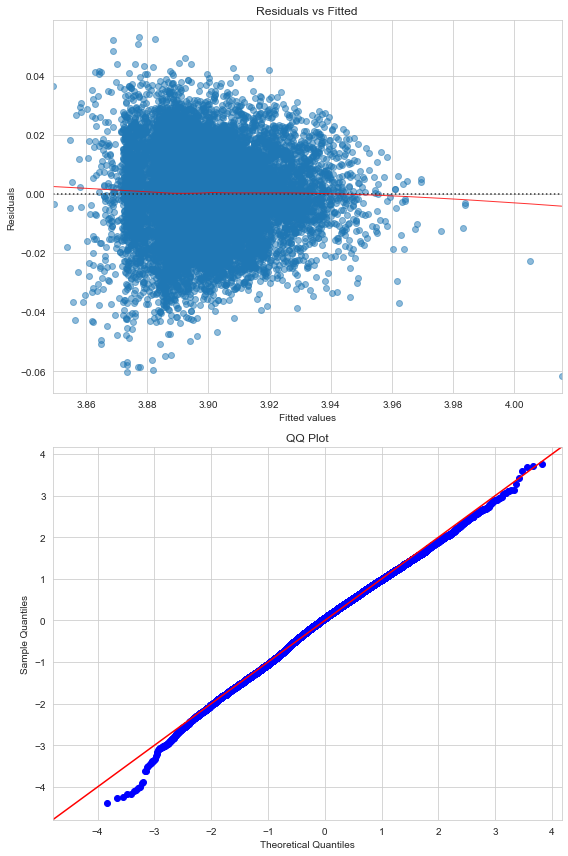

In [40]:
# Diagnostic plots
# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Plot residuals vs. fitted values
sns.residplot(x=mult_results.fittedvalues, y=mult_results.resid, ax=axs[0], lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axs[0].set_title('Residuals vs Fitted')
axs[0].set_xlabel('Fitted values')
axs[0].set_ylabel('Residuals')

# QQ plot of the residuals
sm.qqplot(mult_results.resid, dist=stats.norm, line='45', fit=True, ax=axs[1])
axs[1].set_title('QQ Plot')

# Adjust layout
plt.tight_layout()
plt.show()

Diagnostic Plots:

Residuals vs. Fitted: Any clear pattern might indicate non-linearity or heteroscedasticity.
QQ Plot: It's used to check the normality of residuals. there is a closer alignment of points to the 45-degree line suggests residuals are more normally distributed except at the tails.

In [41]:
# Calculate RMSE using NumPy on original dependent variable (price) and predictions
predictions = mult_results.fittedvalues
rmse_original_units = np.sqrt(np.mean((y_OLS - predictions) ** 2))

# Display RMSE in the original units (dollars)
print("RMSE in Original Units (Dollars):", rmse_original_units)


RMSE in Original Units (Dollars): 656934.8063250879


**R-squared:** The R-squared value has increased from the previous model's approximately 0.457 to 0.548. This indicates that the model now explains about 54.8% of the variance in the transformed house prices, which is an improvement.

**Coefficients:** From the summary, several grades, conditions, and the square footage of living space (sqft_living) are statistically significant predictors of house price, as indicated by their p-values.

**Condition Number:** A large condition number suggests potential multicollinearity or other numerical problems. Given we have multiple predictors, it's possible that some of them are correlated. It might also be due to the scale of the variables.

we observe that while there's an improvement in the R-squared value (from 0.457 to 0.548), the RMSE remains virtually unchanged. 

**R-squared:** This metric tells us the proportion of variance in the dependent variable that's predictable from the independent variables. An increase in R-squared suggests that the new model explains more of the variance in house prices than the previous model.

**RMSE:** It measures the average magnitude of the residuals or prediction errors. An unchanged RMSE suggests that, on average, the model's predictions are still off by a similar amount, even with the inclusion of additional predictors.

So, while the model has become better at explaining the variability in house prices (higher R-squared), it hasn't necessarily become better at predicting them (similar RMSE). This might seem counterintuitive, but it emphasizes the fact that a higher R-squared doesn't always mean a better predictive model.


In conclusion, while adding more predictors has given us a model that better explains the variance in house prices, it hasn't necessarily improved its predictive accuracy. It's essential to strike a balance between explanatory power and predictive accuracy, avoiding overfitting, and ensuring the model remains generalizable.

# Model 3: Includes age of house

we've converted the date column into date time format and extracted the year the house was sold. we've also calculated the years since renovation. This is valuable as properties that were recently renovated might have a different price dynamics compared to those that haven't been updated in a long time.

In [42]:
df_encoded['age_house'] = 2023 - df_encoded['yr_built']
df_encoded['age_house'].unique()

array([ 72,  58,  36,  22,  28,  63,  20,  81,  46, 123,  44,  29, 107,
       102,  54,  76,  55,  38,  82, 114,  18,  94,  42,  93,  90, 119,
        27,  39,   9, 101,  64,  57,  70,  68,  96,  32,  69,  98,  50,
        51,  37,  67,  21,  31,  75,  59,  71,  62,  35,  61,  84,  77,
        56,  48,  43, 113,  40,  73, 118,  52,  13,  78,  33, 109,  34,
        16,  17,  23,  47,  74,  24,  15,  30, 103,  26,  45, 100,  19,
       108,  83, 105,  95,  49,  87,  86, 115,  92,  60,  66,  25, 110,
        80,  10,  99, 112,  65,  12,  91,  41,  14, 120,  79,  53,   8,
        11, 111,  85, 104, 106,  97, 117, 116, 122, 121,  88,  89],
      dtype=int64)

In [43]:
X = df_encoded[['sqft_living','age_house', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good']]
y = df_encoded['transformed_price']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Creating the Model
mult_model = sm.OLS(endog=y, exog=X)

# Fitting the model
mult_results = mult_model.fit()

# Print the summary of the model
print(mult_results.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1479.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:34:34   Log-Likelihood:                 45817.
No. Observations:               15762   AIC:                        -9.160e+04
Df Residuals:                   15745   BIC:                        -9.147e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.8913    

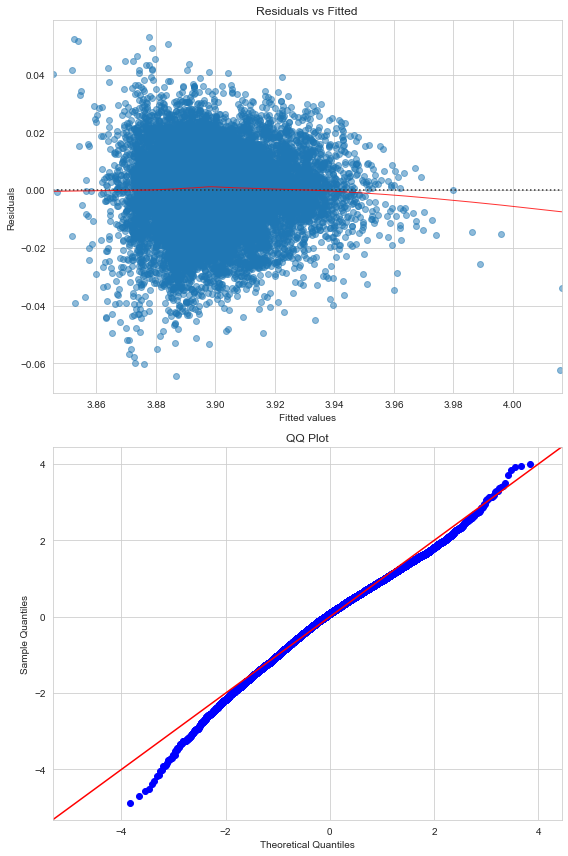

In [44]:
# Diagnostic plots
# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Plot residuals vs. fitted values
sns.residplot(x=mult_results.fittedvalues, y=mult_results.resid, ax=axs[0], lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axs[0].set_title('Residuals vs Fitted')
axs[0].set_xlabel('Fitted values')
axs[0].set_ylabel('Residuals')

# QQ plot of the residuals
sm.qqplot(mult_results.resid, dist=stats.norm, line='45', fit=True, ax=axs[1])
axs[1].set_title('QQ Plot')

# Adjust layout
plt.tight_layout()
plt.show()

Diagnostic Plots:

Residuals vs. Fitted: This plot is essential for checking the homoscedasticity assumption. Ideally, there shouldn't be any pattern.
QQ Plot: This plot checks the normality of residuals. The closer the residuals lie to the 45-degree line, the more normally distributed they are.

In [45]:
# Calculate RMSE using NumPy on original dependent variable (price) and predictions
predictions = mult_results.fittedvalues
rmse_original_units = np.sqrt(np.mean((y_OLS - predictions) ** 2))

# Display RMSE in the original units (dollars)
print("RMSE in Original Units (Dollars):", rmse_original_units)


RMSE in Original Units (Dollars): 656934.8057809832


**R-squared:** The R-squared value has risen to 0.601, showing that about 60.1% of the variance in the transformed house prices is now explained by the model. This is an improvement over both the previous models.

**Coefficients:**

The coefficient for sqft_living remains significant and positive, implying that as the square footage of living space increases, so does the house price.
The coefficient for age_house is also significant and positive, which is interesting. It suggests that older houses, on average, tend to have higher prices. This might be due to factors like location, build quality, or architectural value.
Other significant predictors include various house grades and conditions.

**Multicollinearity:** The condition number is still large, indicating potential multicollinearity issues. This suggests that some predictors might be correlated with each other.


**RMSE:** The RMSE has remained almost unchanged, suggesting that the average prediction error remains similar to the previous model, even with the inclusion of house age.



The third model, which includes the age of the house, does a better job explaining the variability in the house prices than the previous two models, as evidenced by the higher R-squared value. However, the RMSE remains almost the same. This once again highlights the point that a model's explanatory power doesn't always translate to better predictions.

Adding the age of the house as a predictor seems to improve the model's fit, which makes intuitive sense. Older homes might have higher values due to various reasons, such as historical value, location in established neighborhoods, or build quality.



 ## Model 4: Includes years between renovation and sale (assumption is that houses with zero in the yr_renovation column had not be renovated at the time of sale)
 
 the Model introduces the feature Years_Between_Renovation_and_Sale, which captures the time since a house's last renovation (or since it was built if it hasn't been renovated).
 
 The newly added columns, year_sold and Years_Between_Renovation_and_Sale, can offer additional insights. The time since the last renovation can be a significant factor in house pricing. Homes that were recently renovated might fetch higher prices due to updated features, modern design, or improved functionality.
 
### Years_Between_Renovation_and_Sale is calculated by taking the year in the date column (year of sale) - renovation year

In [46]:
# Convert the "date" column to datetime
df_encoded['date'] = pd.to_datetime(df_encoded['date'])

# Extract the year the house was sold
df_encoded['year_sold'] = df_encoded['date'].dt.year

# Replace zero values in "yr_renovated" with the year built
df_encoded['yr_renovated'] = df_encoded.apply(lambda row: row['yr_built'] if row['yr_renovated'] == 0 else row['yr_renovated'], axis=1)

# Calculate the number of years since renovation
df_encoded['Years_Between_Renovation_and_Sale'] = df_encoded['year_sold'] - df_encoded['yr_renovated']

# Display the updated DataFrame
print(df_encoded[['yr_built', 'yr_renovated', 'year_sold', 'Years_Between_Renovation_and_Sale']])

       yr_built  yr_renovated  year_sold  Years_Between_Renovation_and_Sale
1          1951        1991.0       2014                               23.0
3          1965        1965.0       2014                               49.0
4          1987        1987.0       2015                               28.0
5          2001        2001.0       2014                               13.0
6          1995        1995.0       2014                               19.0
...         ...           ...        ...                                ...
21591      2008        2008.0       2015                                7.0
21592      2009        2009.0       2014                                5.0
21593      2014        2014.0       2015                                1.0
21594      2009        2009.0       2014                                5.0
21596      2008        2008.0       2014                                6.0

[15762 rows x 4 columns]


In [47]:
X = df_encoded[['sqft_living','age_house', 'Years_Between_Renovation_and_Sale', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good']]
y = df_encoded['transformed_price']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Creating the Model
mult_model = sm.OLS(endog=y, exog=X)

# Fitting the model
mult_results = mult_model.fit()

# Print the summary of the model
print(mult_results.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1393.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:37:40   Log-Likelihood:                 45819.
No. Observations:               15762   AIC:                        -9.160e+04
Df Residuals:                   15744   BIC:                        -9.146e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [48]:
# Calculate RMSE using NumPy on original dependent variable (price) and predictions
predictions = mult_results.fittedvalues
rmse_original_units = np.sqrt(np.mean((y_OLS - predictions) ** 2))

# Display RMSE in the original units (dollars)
print("Model 4 RMSE in Original Units (Dollars):", rmse_original_units)

Model 4 RMSE in Original Units (Dollars): 656934.8057765089


**R-squared:** The R-squared value remains at 0.601, implying that the addition of the new feature didn't notably improve the proportion of variance the model explains in the target variable.

**Coefficients:**

Most coefficients and their significance levels remain consistent with Model 3.


**Years_Between_Renovation_and_Sale** has a negative coefficient, indicating that as the number of years since the last renovation increases, the house price decreases, holding other variables constant. This is an expected trend, as homes that haven't been renovated for a long time might not fetch as high a price as recently renovated ones. However, the coefficient is small, suggesting a minor effect.

**Multicollinearity:** The condition number remains large, indicating potential multicollinearity. This is a consistent observation across all models.

**RMSE:** The RMSE remains almost unchanged at approximately 656934.81 dollars, suggesting that the model's prediction accuracy hasn't notably improved with the addition of the new feature.

Model 4 introduces the variable Years_Between_Renovation_and_Sale to capture the effect of the time since a home's last renovation on its price. While the coefficient for this variable is significant, its impact on the overall model fit and prediction accuracy seems to be minor.

In terms of house pricing, this analysis suggests that while the square footage of living space (sqft_living) and the age of the house (age_house) are significant determinants of price, the time since the last renovation has a relatively minor impact.


## Model 5: Includes view(encoded)

Model 5 incorporates both the floors and view variables

In [49]:
X = df_encoded[['sqft_living','age_house', 'floors', 'Years_Between_Renovation_and_Sale', 'grade_11 Excellent', 'grade_12 Luxury', 
                'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 
                'grade_8 Good', 'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good',
               'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0' ]]
y = df_encoded['transformed_price']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Creating the Model
mult_model = sm.OLS(endog=y, exog=X)

# Fitting the model
mult_results = mult_model.fit()

# Print the summary of the model
print(mult_results.summary())


                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1149.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:38:59   Log-Likelihood:                 46134.
No. Observations:               15762   AIC:                        -9.222e+04
Df Residuals:                   15739   BIC:                        -9.205e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

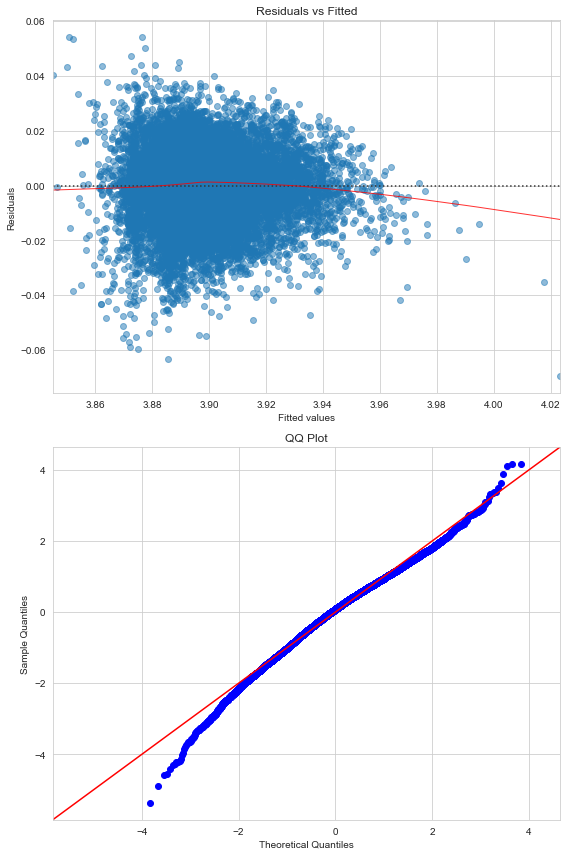

In [50]:
# Diagnostic plots
# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Plot residuals vs. fitted values
sns.residplot(x=mult_results.fittedvalues, y=mult_results.resid, ax=axs[0], lowess=True, 
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axs[0].set_title('Residuals vs Fitted')
axs[0].set_xlabel('Fitted values')
axs[0].set_ylabel('Residuals')

# QQ plot of the residuals
sm.qqplot(mult_results.resid, dist=stats.norm, line='45', fit=True, ax=axs[1])
axs[1].set_title('QQ Plot')

# Adjust layout
plt.tight_layout()
plt.show()

Diagnostic Plots:

The Residuals vs. Fitted plot suggests that the model might not capture all the patterns in the data, as the residuals don't appear to be completely random.
The QQ plot indicates that the residuals are approximately normally distributed, though there are some deviations from normality at the tails.

In [51]:
# Calculate RMSE using NumPy on original dependent variable (price) and predictions
predictions = mult_results.fittedvalues
rmse_original_units = np.sqrt(np.mean((y_OLS - predictions) ** 2))

# Display RMSE in the original units (dollars)
print("Model 5 RMSE in Original Units (Dollars):", rmse_original_units)

Model 5 RMSE in Original Units (Dollars): 656934.8055515656


**R-squared:** The model has an R-squared value of 0.616, a slight improvement over the previous models. This suggests that the added features, particularly the view variables, provide some additional explanatory power.

**Coefficients:**

The coefficients for sqft_living, age_house, and house grades remain largely consistent with previous models in terms of direction and significance.
The floors variable has a positive coefficient, suggesting that houses with more floors tend to have higher prices.
The view variables (view_1.0 to view_4.0) are all positive, indicating that houses with better views tend to sell for more. Among them, view_1.0 has the highest coefficient, suggesting it provides the most value in terms of house price. This might be counterintuitive if we consider view_4.0 to be the best view, so it would be essential to understand the encoding's meaning.
Years_Between_Renovation_and_Sale still has a minor impact on the house price in this model.
Significance:

Most of the significant variables from previous models remain significant.
All view variables are significant, emphasizing the importance of a house's view on its price.
Multicollinearity: The condition number remains large, suggesting potential multicollinearity. This is consistent across all models.


**RMSE:** The RMSE for Model 5 is approximately 656934.81 dollars. It remains almost unchanged from the previous models, suggesting that while the model's explanatory power (R-squared) increased slightly, its predictive accuracy remains similar.


Model 5, with an R-squared of 0.616, captures slightly more variance in the target variable than the previous models. The inclusion of floors and view variables provides some additional understanding of the factors influencing house prices. The view a house offers significantly affects its price, a finding that aligns well with conventional wisdom in real estate.



The **RMSE** for Models 2, 3, 4 and 5 remains almost constant, indicating that the prediction error remains similar across these models despite the inclusion of new predictors. This showcases an important modeling consideration: adding more predictors doesn't always lead to a better predictive model. It might, however, result in a better understanding of the underlying processes.

### Recommendations for Haven-Kings Property Management:

**Prioritize Living Space:** Given the high correlation between sqft_living and the house price, prioritize properties with larger living spaces when considering acquisitions or pricing.

**Consider Property Quality and Condition:**  Model 2 emphasizes property grade and condition as crucial determinants of price. Ensure that properties under management are well-maintained to command higher rental or sale prices.

**Factor in Age:** The age of a house can significantly impact its value. Older houses might carry historical or architectural significance, while newer ones might boast modern amenities. Understand the pros and cons associated with a property's age when setting prices.

**Renovation Impact:** Model 4 focuses on the years since renovation. Properties that have been recently renovated might fetch higher prices. Consider investing in renovations for older properties to increase their market value.

**Views Matter:** The view from a property can significantly influence its perceived value. Properties with better views can command higher prices. Ensure this factor is appropriately considered in pricing strategies.

**Dynamic Pricing Strategy:** Consider developing a dynamic pricing strategy that takes into account various property features and market conditions. Use insights from all models to adjust rental rates or sale prices to maximize returns while staying competitive.

### Recommendations for Data Gurus group 5

Since we shall continue working Haven-Kings Property Management as our client and work on developing the models further as well as do machine learning. we need to check on below items :

**Multicollinearity:** Be wary of multicollinearity, especially with correlated predictors like bedrooms, bathrooms, and sqft_living. While it's essential to capture as much variance as possible, adding correlated predictors can destabilize regression estimates.


**Iterative Model Refinement:** Continuously refine and evaluate models based on new data and feedback. While these models provide valuable insights, the real estate market is dynamic, and models should adapt to changing conditions.


In summary, each model provides unique insights that can guide Haven-Kings Property Management in refining their pricing strategies. By considering the predictors highlighted in these models and being aware of potential pitfalls like multicollinearity, Haven-Kings can make more informed decisions and optimize their returns in the King County real estate market.
